In [1]:
import numpy as np
import math
import time
import matplotlib.pyplot as plt

In [2]:
N = 10000
num_list = list(100*(np.random.random(N))+1)

#### %time: Time the execution of a single statement
#### %timeit: Time repeated execution of a single statement for more accuracy

### For Loop

In [3]:
res = []

def loop_fun(ip):
    for item in ip:
        res.append(math.log(item))

%timeit loop_fun(num_list)

6.87 ms ± 549 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


### Map

In [4]:
def op(x):
    return math.log(x)

def map_fun(ip):
    res = list(map(op,ip))

%timeit map_fun(num_list)

6.28 ms ± 393 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


### List Comprehension

In [5]:
def comp_fun(ip):
    res = [math.log(i) for i in ip]

%timeit comp_fun(num_list)

5.05 ms ± 157 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


### Numpy

In [6]:
def numpy_fun(ip):
    res = np.log(ip)

%timeit numpy_fun(num_list)

1.74 ms ± 9.5 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


### Other Examples

In [7]:
%%timeit
total = 0
for i in range(1000):
    for j in range(1000):
        total += i * (-1) ** j

1.21 s ± 81.7 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [8]:
L = [np.random.random() for i in range(100000)]
%time L.sort()
%time L.sort()

Wall time: 63.3 ms
Wall time: 2.04 ms


### Vectorization
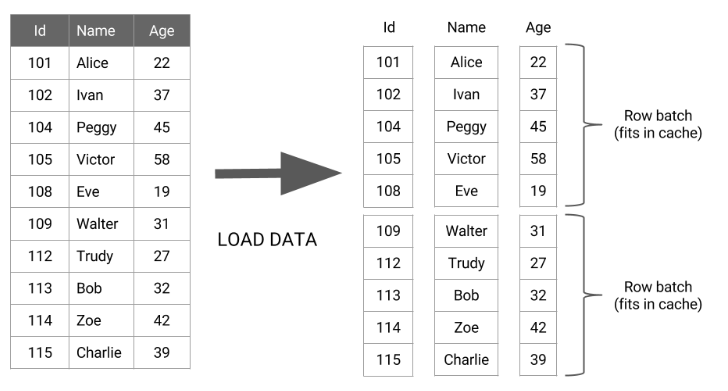

In [9]:
a = [1, 2, 3, 4, 5]
b = [6, 7, 8, 9, 10]
c = [[1,2], [3,4]]
d = np.asarray(c)
%timeit [x * y for x, y in zip(a, b)]

a = np.array(a)
b = np.array(b)
%timeit a * b

a = list(range(10000))
b = list(range(10000))
%timeit [x * y for x, y in zip(a, b)]

a = np.array(a)
b = np.array(b)
%timeit a * b

2.26 µs ± 376 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
1.19 µs ± 31.6 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)
2.15 ms ± 275 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
22.7 µs ± 2.24 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


### Broadcasting
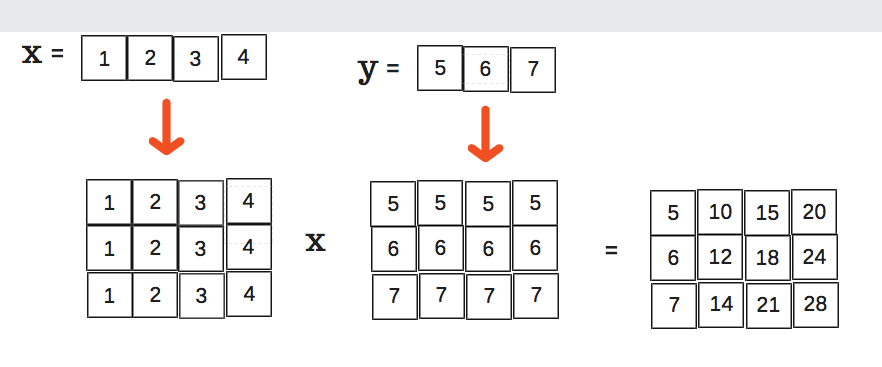

In [10]:
# Naive
def sum_prod(x, y):
    res = 0
    for i in x:
        for j in y:
            res += i*j
    return res

# Vectorization
def sum_prod_vec(x, y):
    x = x[np.newaxis, :]
    y = y[:, np.newaxis]
    return (x*y).flatten().sum()

# Actual
def sum_prod_n(x, y):
    return np.outer(x, y)
    

x = np.array((1, 2, 3, 4))
y = np.array((5, 6, 7))
%timeit sum_prod(x,y)
%timeit sum_prod_vec(x,y)
%timeit sum_prod_n(x,y)
print("======")
x = np.random.randn(10000)
y = np.random.randn(5000)
%timeit sum_prod(x,y)
%timeit sum_prod_vec(x,y)
%timeit sum_prod_n(x,y)

16 µs ± 1.32 µs per loop (mean ± std. dev. of 7 runs, 100000 loops each)
12.7 µs ± 534 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
8.86 µs ± 209 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
22.1 s ± 1.01 s per loop (mean ± std. dev. of 7 runs, 1 loop each)
977 ms ± 3.7 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
467 ms ± 8.54 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


#### Time and Memory Profiling
https://jakevdp.github.io/PythonDataScienceHandbook/01.07-timing-and-profiling.html